# Scenario


Hospitals are being penalized by CMS for excessive readmissions, but many are not adequately prepared. The number of hospitals being penalized has increased, despite most hospitals being confident in their ability to reduce readmissions. However, less than 20% of hospitals use specific technology, which may lead to a higher penalty rate. The aim of this assignment is to prepare the data for analysis in order to gain insight into the causes of patient readmissions.

# Data Cleaning

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy.stats import zscore
from sklearn.decomposition import PCA

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
# Settings
%matplotlib inline
sns.set_style("darkgrid")
pd.set_option("display.max_columns", None)

In [2]:
# Loading Data
df = pd.read_csv('medical_raw_data.csv')

## Data Inspection
Firstly, it's crucial to carefully analyze the data to understand its format, structure, and contents. This will allow us to identify and correct any errors or abnormalities.

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

None

In [4]:
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3


## Data Filtering
The goal is to get rid of any information that is unnecessary or not useful for the analysis. I'll begin by checking for duplicate rows to remove any redundant entries and identify unnecessary columns to drop so we can focus on the relevant information.

In [5]:
#  Checking for duplicate values
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

The data contains various columns that serve only for searching and identifying specific cases in a corporate environment. These include Unnamed: 0, UID, CaseOrder, Interaction, and Customer_id. Meanwhile, attributes such as Zip, Lng, Lat, Population, and Timezone, which are location-related, are not essential in comprehending patient readmission to the hospital.

In [6]:
# Dropping unnecessary columns 
# df.drop(columns=['Unnamed: 0', 'UID', 'CaseOrder', 'Customer_id', 'Interaction',
#         'Zip', 'Lat', 'Lng', 'Population', 'Timezone'],inplace = True,errors='ignore')
df.drop(columns=['Unnamed: 0'],inplace=True);

## Standardize
Now, we'll take a closer look at the data to catch any spelling or formatting errors. Once we've done that, we'll work on making sure everything is in a consistent format so that it's easier to understand.

In [7]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3


To make it easier for everyone to understand, it's a good idea to rename the columns labeled Item1 through Item8 to match the data dictionary.I'll rename these columns as follows:
- Item1 -> Timely_Admission
- Item2 -> Timely_Treatment
- Item3 -> Timely_Visit
- Item4 -> Reliability
- Item5 -> Options
- Item6 -> Treat_Hrs
- Item7 -> Courteous_Staff
- Item8 -> Active_Listening.

In [8]:
df.rename(columns={'Item1': 'Timely_Admission', 'Item2': 'Timely_Treatment', 'Item3': 'Timely_Visit',
                   'Item4': 'Reliability', 'Item5': 'Options', 'Item6': 'Treat_Hrs',
                   'Item7': 'Courteous_Staff', 'Item8': 'Active_Listening'}, inplace=True)

A helpful way to identify differences is to highlight the unique values.

In [9]:
# Get the unique values for each column.
unique_values = [df[column].unique() for column in df]

# Return a dataframe of all unique values.
df_unique=pd.DataFrame({'column': df.columns, 'value': unique_values})
df_unique

,column,value
0,CaseOrder,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Customer_id,"[C412403, Z919181, F995323, A879973, C544523, ..."
2,Interaction,"[8cd49b13-f45a-4b47-a2bd-173ffa932c2f, d2450b7..."
3,UID,"[3a83ddb66e2ae73798bdf1d705dc0932, 176354c5eef..."
4,City,"[Eva, Marianna, Sioux Falls, New Richland, Wes..."
5,State,"[AL, FL, SD, MN, VA, OK, OH, MS, WI, IA, CA, I..."
6,County,"[Morgan, Jackson, Minnehaha, Waseca, King Will..."
7,Zip,"[35621, 32446, 57110, 56072, 23181, 74423, 440..."
8,Lat,"[34.3496, 30.84513, 43.54321, 43.89744, 37.598..."
9,Lng,"[-86.72508, -85.22907, -96.63772, -93.51479, -..."


Next up, I'll make sure all the information is formatted correctly. For instance, I'll adjust the number of children from decimal to its proper format.

In [10]:
# Round and convert to integer.
df['Age'] = df['Age'].astype('Int64', errors='ignore')
df['Children'] = df['Children'].astype('Int64', errors='ignore')
df['Overweight'] = df['Overweight'].astype('Int64', errors='ignore')
df['Anxiety'] = df['Anxiety'].astype('Int64', errors='ignore')


# Round to fit currency format
df['TotalCharge']= df['TotalCharge'].round(2)
df['Additional_charges']= df['Additional_charges'].round(2)


# Convert all strings to lowercase
df = df.applymap(lambda s: s.lower() if type(s) == str else s)
# Replace all yes/no responses with 1 and 0 respectively 
df.replace({'yes': int(1), 'no': int(0)},inplace=True)
# Convert to integer.
df['Soft_drink'] = df['Soft_drink'].astype('Int64', errors='ignore')


## Handling Missing Values


To handle any missing data, I will assess the amount and type of absent data. 

Below the graph shows the several columns have missing values, including Children, Age, Income, Soft_drink, Overweight, Anxiety, and Initial_days. Decisions will need to be made on how to handle these, such as imputing or removing records with missing values.

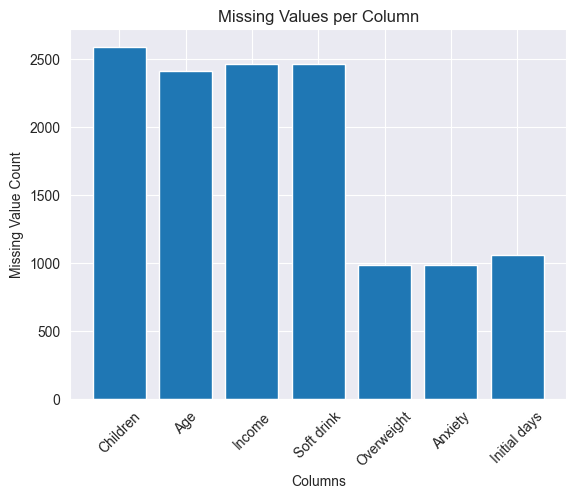

In [11]:
# Filter columns with missing values
columns_with_missing = df.columns[df.isna().any()].tolist()
df_missing = df[columns_with_missing]

# Count missing values in each column
missing_counts = df_missing.isna().sum()

columns_pretty = [str.replace(x,'_',' ') for x in columns_with_missing]

# Plot histogram
plt.bar(columns_pretty, missing_counts.values)
plt.xlabel('Columns')
plt.ylabel('Missing Value Count')
plt.title('Missing Values per Column')
plt.xticks(rotation=45)
plt.show()

### Soft_drink Categorical (binary):

In order to address the missing values in the Soft_drink column, I have decided to use the mode imputation method. This approach is suitable for binary categories and although it may introduce some bias, I believe that the feature is not significant enough to cause any major issues.

In [12]:
drink = df['Soft_drink'].dropna().astype('Int64').to_numpy()

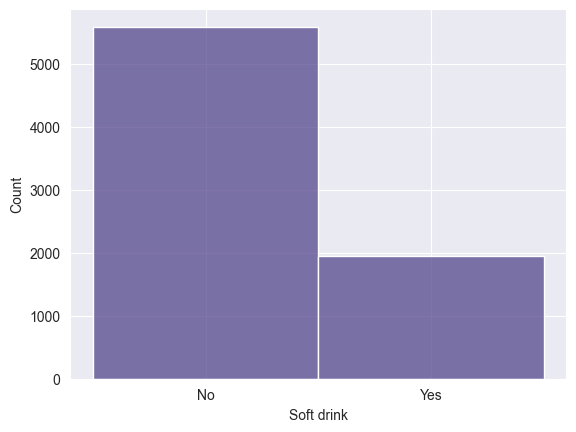

In [13]:
ax = sns.histplot(drink,discrete=True,color='#54478C');
ax.set(xticks=[0, 1]);
ax.set(xticklabels=['No','Yes']);
ax.set_xlabel('Soft drink');

In [14]:
df['Soft_drink'].fillna(0,inplace=True)

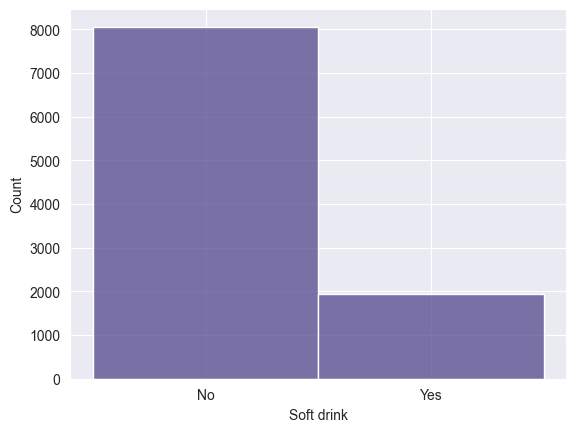

In [15]:
drink=df['Soft_drink'].astype('Int64').to_numpy()
ax = sns.histplot(drink,discrete=True,color='#54478C');
ax.set(xticks=[0, 1]);
ax.set(xticklabels=['No','Yes']);
ax.set_xlabel('Soft drink');

### Overweight: Categorical (binary) 

There are some missing values in the overweight category that could affect our analysis. To avoid a large bias, I'll remove any missing data. 

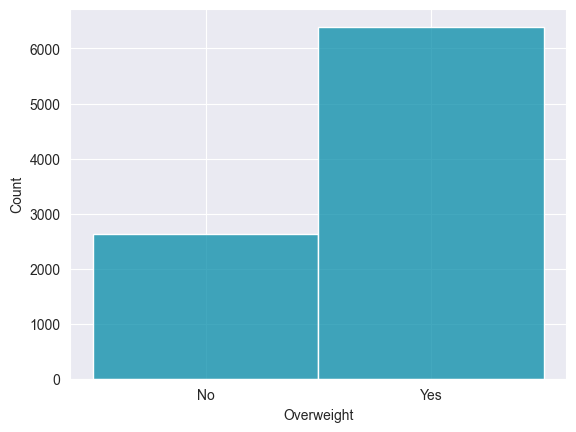

In [16]:
ax = sns.histplot(df['Overweight'].dropna(),discrete=True,color='#048BA8');
df.dropna(subset=['Overweight'], inplace=True)
ax.set(xticks=[0, 1]);
ax.set(xticklabels=['No','Yes']);

### Anxiety: Categorical (binary)

Like the Overweight feature, the missing values could affect our analysis. I'll remove any lost data. 

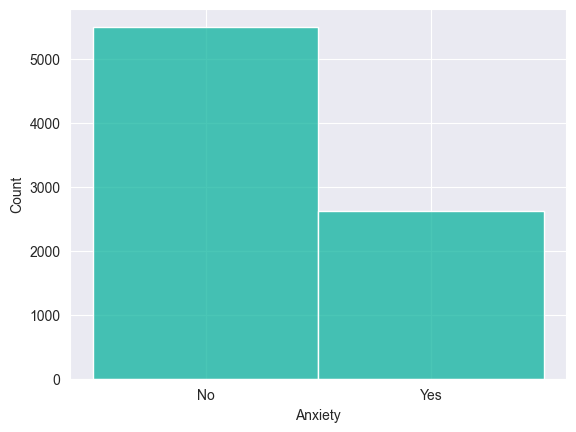

In [17]:
ax = sns.histplot(df['Anxiety'].dropna(),discrete=True,color='#0DB39E');
df.dropna(subset=['Anxiety'], inplace=True)
ax.set(xticks=[0, 1]);
ax.set(xticklabels=['No','Yes']);

### Initial_days: Numerical (float):
Initial days represents the number of days since an initial event. I'll use KKN because it provides a good balance between computational cost and accuracy, especially if there are related features that can help predict this column.

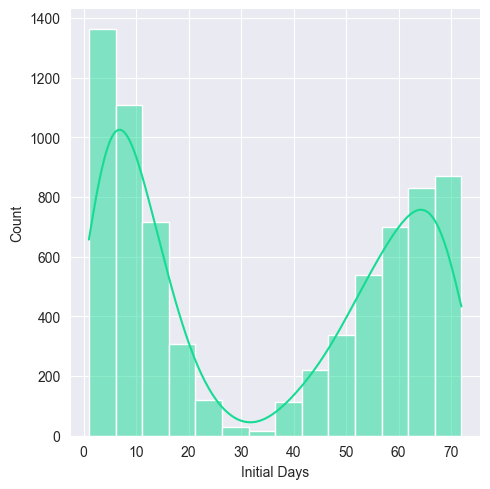

In [18]:
ax = sns.displot(df['Initial_days'], kde=True,color='#16DB93');
ax.set_axis_labels(x_var='Initial Days');

In [19]:
knn_imputer_median = KNNImputer(n_neighbors=3)
df['Income'] = knn_imputer_median.fit_transform(df['Income'].to_numpy().reshape(-1, 1))

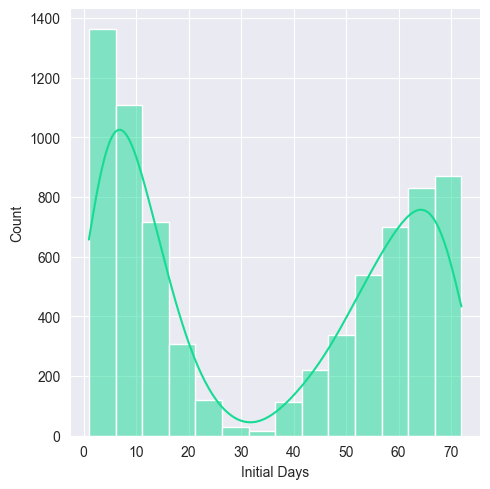

In [20]:
ax = sns.displot(df['Initial_days'], kde=True,color='#16DB93');
ax.set_axis_labels(x_var='Initial Days');

### Income Numerical (float):

Median imputation has the advantage of being robust against outliers.Given the spread and potential outliers in income, I'll use the median to fill in the missing values.


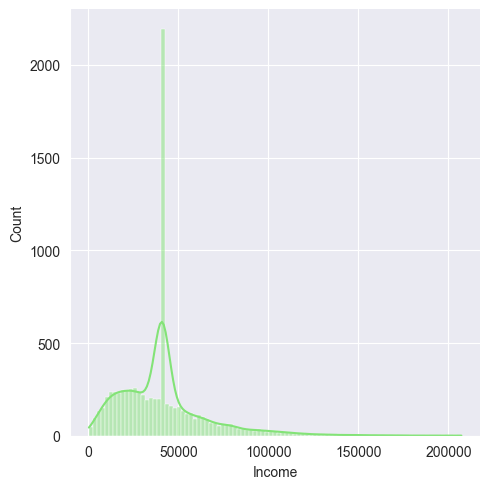

In [21]:
ax = sns.displot(df['Income'],kde = True ,color='#83E377');
ax.set_axis_labels(x_var='Income');

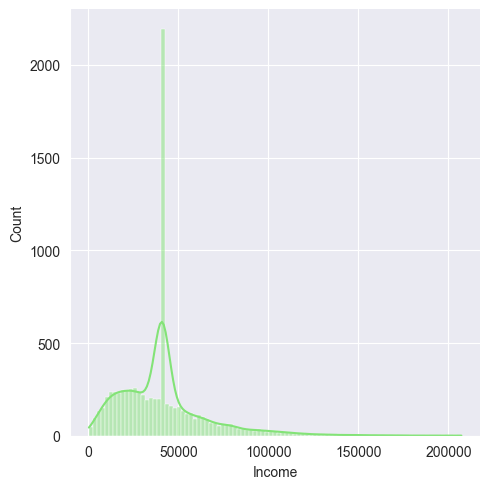

In [22]:
simple_imputer_median = SimpleImputer(strategy='median')
df['Income'] = simple_imputer_median.fit_transform(df['Income'].to_numpy().reshape(-1, 1))
ax = sns.displot(df['Income'],kde = True,color='#83E377',);

### Age: Numerical (int)

Given its fairly even spread, the median will be best for simple imputation.

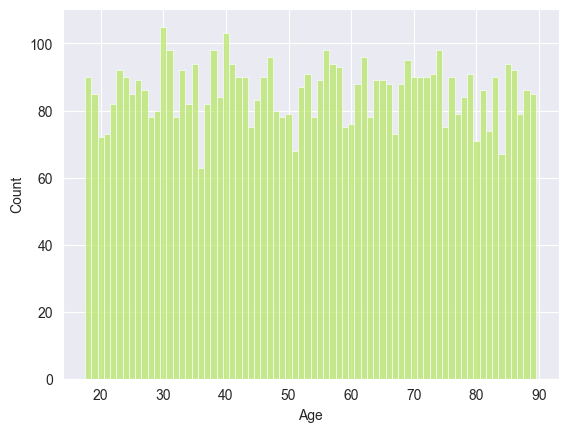

In [23]:
ax = sns.histplot(df['Age'].dropna(),discrete=True,color='#B9E769');

In [24]:
# Filled in with the median.
df['Age'] = df['Age'].apply(lambda x: np.nan if pd.isna(x) else x)
simple_imputer_median = SimpleImputer(strategy='median')
df['Age'] = simple_imputer_median.fit_transform(np.array(df['Age']).reshape(-1,1))

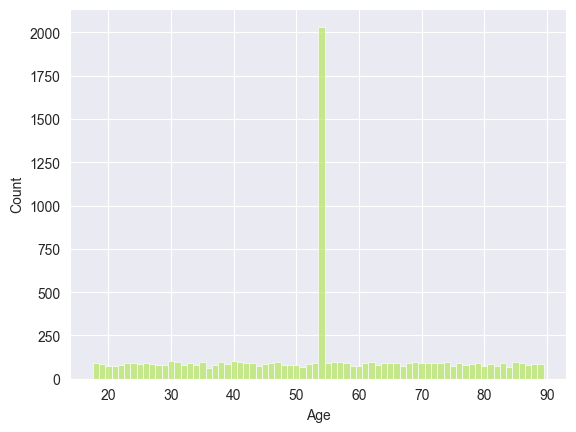

In [25]:
ax = sns.histplot(df['Age'],discrete=True,color='#B9E769');

### Children Numerical (int):

For this column, I'll use the median to fill in missing values.

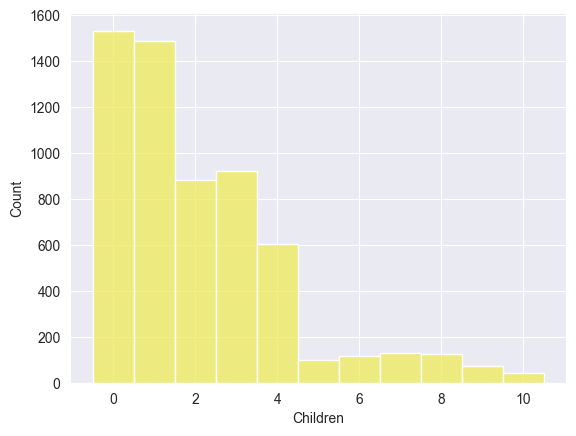

In [26]:
df['Children'] = df['Children'].apply(lambda x: np.nan if pd.isna(x) else x)

# Filter out NaN values before plotting
filtered_data = df['Children'].dropna()

sns.histplot(filtered_data, discrete=True,color='#EFEA5A');

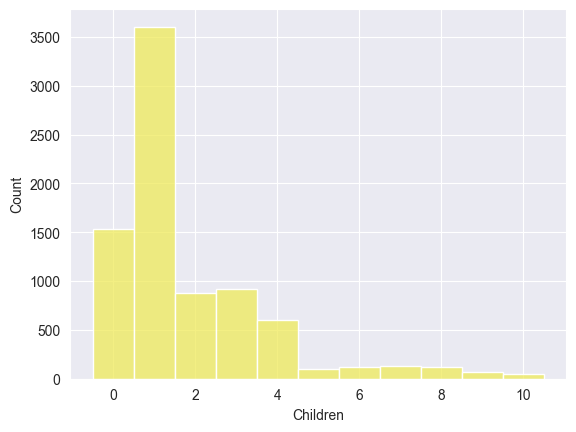

In [27]:
# Fill in nulls for Children column with the median
df['Children'].fillna(df['Children'].median(),inplace=True)
sns.histplot(df['Children'],discrete=True,color='#EFEA5A');

Let's see if we handled all the null values.

In [28]:
df.columns.isna().any()

False

## Handling Outliers

### Income

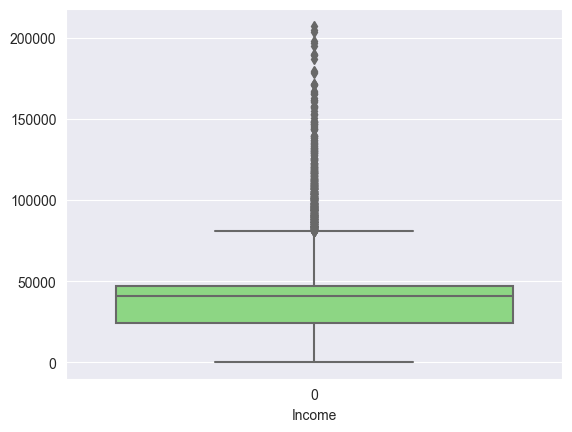

In [29]:
ax = sns.boxplot(df['Income'],color='#83E377');
ax.set_xlabel(xlabel='Income');

After analyzing the graph, capping the income would be best.
I decided on using the IQR method for this feature.

In [30]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['Income'] = np.where(df['Income'] < lower_bound, lower_bound, df['Income'])
df['Income'] = np.where(df['Income'] > upper_bound, upper_bound, df['Income'])

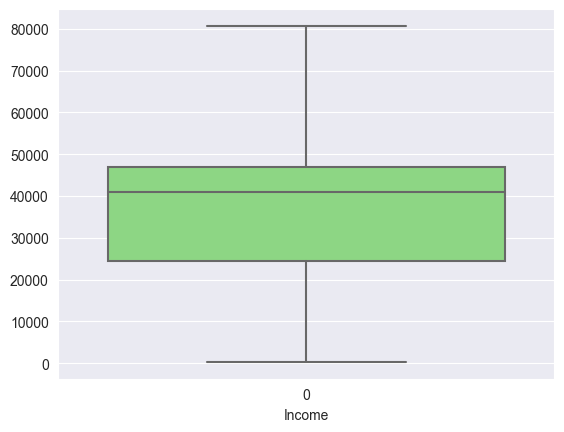

In [31]:
ax = sns.boxplot(df['Income'],color='#83E377');
ax.set_xlabel(xlabel='Income');

### Children

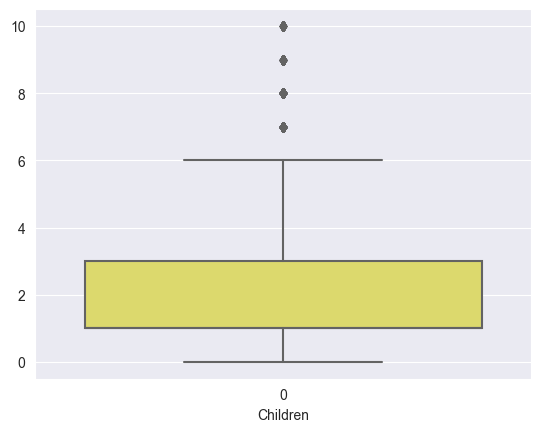

In [32]:
ax = sns.boxplot(df['Children'],color='#EFEA5A');
ax.set_xlabel(xlabel='Children');

In [33]:
df['Children'].value_counts()

Children
1.0     3605
0.0     1532
3.0      920
2.0      882
4.0      603
7.0      128
8.0      124
6.0      115
5.0      100
9.0       73
10.0      44
Name: count, dtype: int64

Upon examining the graph and taking other factors into account, I'll cap the number of children at six.

In [34]:
df.loc[df['Children'] > 6, 'Children'] = 6

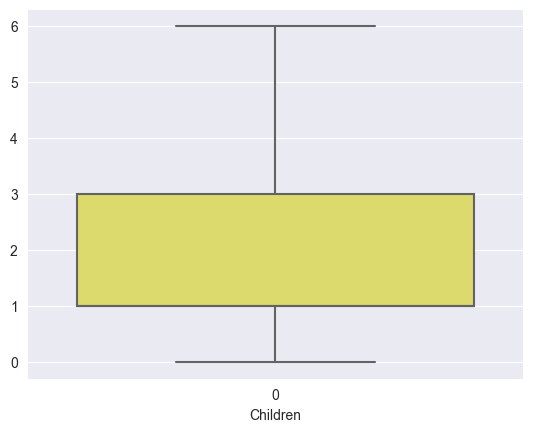

In [35]:
ax = sns.boxplot(df['Children'],color='#EFEA5A');
ax.set_xlabel(xlabel='Children');

### Vitamin D Levels

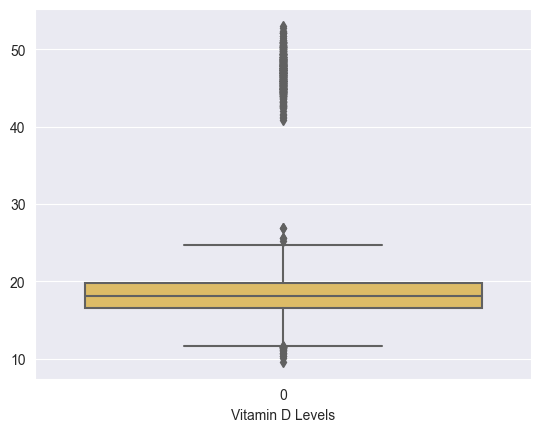

In [36]:
ax = sns.boxplot(df['VitD_levels'],color='#F1C453');
ax.set_xlabel(xlabel='Vitamin D Levels');

In [37]:
df['VitD_levels'].describe()

count    8126.000000
mean       19.421148
std         6.747111
min         9.574292
25%        16.519552
50%        18.078905
75%        19.800599
max        53.019124
Name: VitD_levels, dtype: float64

For the VitD levels, I used the IQR method followed by capping

In [38]:
Q1 = df['VitD_levels'].quantile(0.25)
Q3 = df['VitD_levels'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Capping the outliers
df['VitD_levels'] = np.where(df['VitD_levels'] < lower_bound, lower_bound, df['VitD_levels'])
df['VitD_levels'] = np.where(df['VitD_levels'] > upper_bound, upper_bound, df['VitD_levels'])

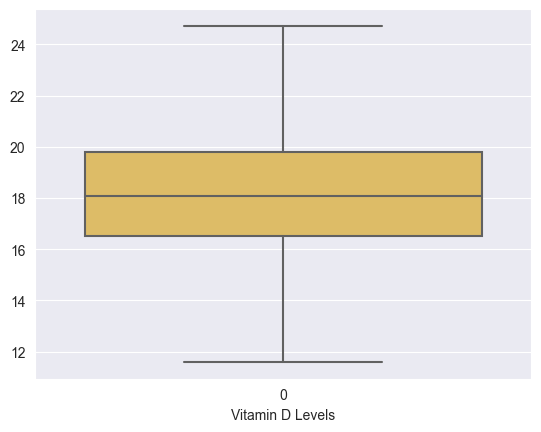

In [39]:
ax = sns.boxplot(df['VitD_levels'],color='#F1C453');
ax.set_xlabel(xlabel='Vitamin D Levels');

### TotalCharge

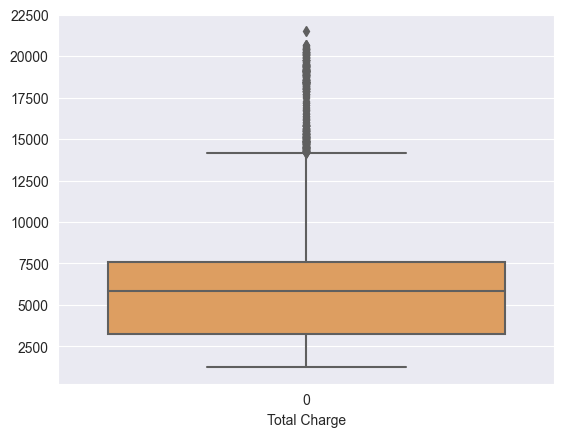

In [40]:
ax = sns.boxplot(df['TotalCharge'],color='#F29E4C');
ax.set_xlabel(xlabel='Total Charge');

In [41]:
df['TotalCharge'].describe()

count     8126.000000
mean      5884.255004
std       3372.649698
min       1256.750000
25%       3243.185000
50%       5851.415000
75%       7611.612500
max      21524.220000
Name: TotalCharge, dtype: float64

This method caps the identified outliers to either the lower bound or upper bound calculated using the IQR method

In [42]:
# Calculate IQR thresholds
Q1 = df['TotalCharge'].quantile(0.25)
Q3 = df['TotalCharge'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers using IQR
iqr_outliers = (df['TotalCharge'] < lower_bound) | (df['TotalCharge'] > upper_bound)

# Identify outliers using Z-scores
z_scores = zscore(df['TotalCharge'])
z_outliers = (z_scores < -3) | (z_scores > 3)

# Consider data points identified as outliers by both methods as true outliers
true_outliers = iqr_outliers & z_outliers

# Fill in outliers by capping them
df.loc[true_outliers & (df['TotalCharge'] < lower_bound), 'TotalCharge'] = lower_bound
df.loc[true_outliers & (df['TotalCharge'] > upper_bound), 'TotalCharge'] = upper_bound


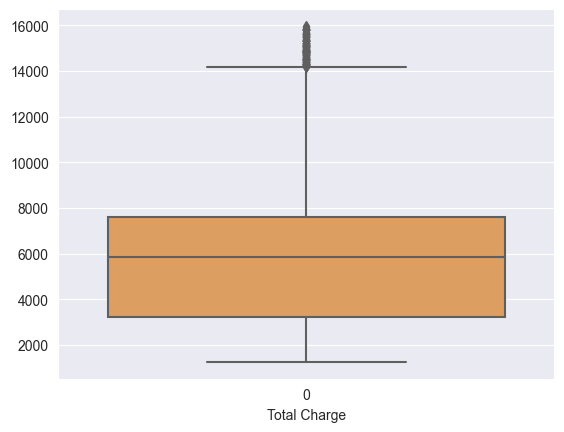

In [43]:
ax = sns.boxplot(df['TotalCharge'],color='#F29E4C');
ax.set_xlabel(xlabel='Total Charge');

In [44]:
df.to_csv('cleaned_medical_data.csv',index=False)

# Data Analysis: Principal Component Analysis (PCA)
Moving on to data analysis, we'll employ Principal Component Analysis (PCA) to gain insights from the cleaned data.

In [45]:
from sklearn.decomposition import PCA

## Loading Data
To begin my analysis, I will import the cleaned data and extract only the numeric data. Additionally, I will exclude the survey response columns since they are categorical features.

In [46]:
clean_df = pd.read_csv('cleaned_medical_data.csv')
med_data = clean_df.select_dtypes(include=['float'])
med_data['Age'] = clean_df['Age']
columns_with_missing = clean_df.columns[clean_df.isna().any()].tolist()
columns_with_missing

['Initial_days']

## Principal Components
I'll use StandardScaler from the sklearn library to standardize the data, and then perform PCA to create principal components. After, I'll make a scree plot to visualize the eigenvalues.

In [47]:
# Standardize
X = StandardScaler().fit_transform(med_data.dropna())
# Create principal components
pca = PCA()
pca.fit(X)
med_pca = pd.DataFrame(pca.transform(X),
columns=[f"PC{i+1}" for i in range(X.shape[1])])           

# Load into dataframe
loadings = pd.DataFrame(pca.components_.T,columns=[f"PC{i+1}" for i in range(X.shape[1])],
index=med_data.columns)
display(loadings)              

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Lat,-0.020369,-0.024570,0.695707,0.133833,-0.063775,-0.022360,-0.701775,-0.001996,0.001695
Lng,-0.000598,0.014284,-0.694964,-0.078287,-0.141659,0.090330,-0.694429,0.012898,-0.008106
Children,0.006516,0.006900,0.086117,-0.228863,0.376930,0.892915,-0.021350,-0.016008,0.005513
Age,0.072276,0.703124,0.011365,0.008066,-0.013706,-0.012309,-0.010186,-0.706179,0.032648
Income,-0.005435,-0.008547,-0.112843,0.234024,0.902442,-0.313586,-0.138765,-0.018605,-0.007528
VitD_levels,0.353281,-0.042522,-0.087068,0.798016,-0.118804,0.264220,0.058630,-0.018988,-0.375830
Initial_days,0.602697,-0.061631,0.067125,-0.481148,0.068227,-0.160359,-0.043012,-0.029890,-0.603188
TotalCharge,0.707799,-0.070933,0.000302,0.017117,0.001993,-0.005119,-0.012918,0.034691,0.701638
Additional_charges,0.072517,0.702887,0.025504,0.011110,0.020629,-0.001476,-0.003236,0.705748,-0.037399


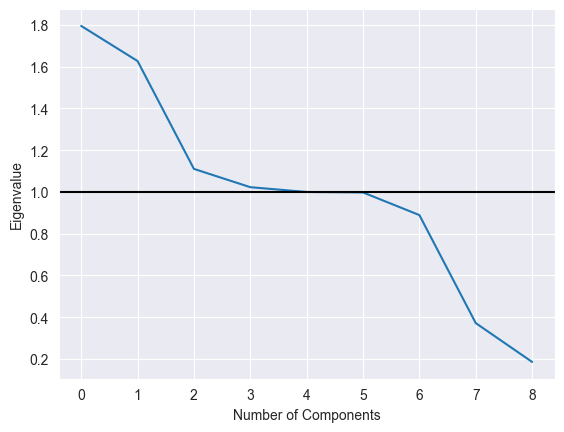

In [48]:
# Calculating eigenvalues
cov_matrix = np.dot(X.T, X) / X.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]

# Plotting eigenvalues
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.axhline(y=1,color='black')
plt.show()

In [49]:
sorted_eigenvalues = sorted(eigenvalues, reverse=True)
print(list(enumerate(sorted_eigenvalues,1)))

[(1, 1.795719402370587), (2, 1.627338599508903), (3, 1.110484824714082), (4, 1.0228430683594074), (5, 0.9998721543960869), (6, 0.9977110165193946), (7, 0.8891604524476517), (8, 0.37147641653700403), (9, 0.18539406514688378)]


Based on the eigenvalues there are 4 principal components